# Lista 1 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

## 1) Regressão Linear Univariada

- Carregue os dados contidos no arquivo _ex1data1.txt_. O arquivo contem 97 linhas e 2 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 2 será estimada a partir da variável da coluna 1.

    - **Apresentar:** Figura com os dados.
    - **Comentários**: Um modelo de regressão linear parece ser adequado para os dados em questão? Comente.
    


- Implemente o algoritmo do gradiente descendente estocástico para encontrar os coeficientes da regressão. Para este algoritmo utilize **α = 0.001** e utilize **1000 épocas** de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM) . Plote o gráfico “épocas x EQM”.

    - **Apresentar**: Valor final dos coeficientes e gráfico épocas x EQM.
    - **Comentários**: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.



### Carregando os dados do arquivo:

In [1]:
import numpy as np

def load_data(file_name, delimiter_):
    return np.genfromtxt(file_name, delimiter = delimiter_)

data = load_data('ex1data1.txt', ',')

### Figura com os dados:

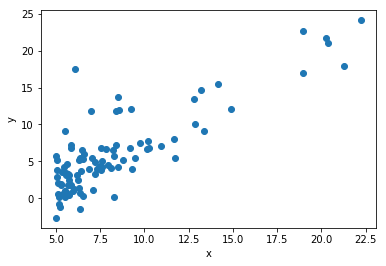

In [2]:
import matplotlib.pyplot as plt

plt.plot(data[:, :-1], data[:, -1], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Adequação ao modelo linear:

O modelo de regressão linear parece adequado pois, ao observar o gráfico, é possível perceber que há uma considerável correlação positiva entre entre X e Y.

### Algoritmo do gradiente descendente estocástico e algumas funções auxiliares:

In [3]:
def get_x(data):
    X = data[:, :-1]
    m = X.shape[0]
    ones = np.ones((m, 1))
    return np.concatenate((ones, X), axis = 1)

def get_y(data):
    y = data[:, -1]
    y = np.array([y])
    return y.T

def cost(X, w, y):
    m = X.shape[0]
    return (1.0/(2.0*m))*np.sum((X.dot(w) - y)**2)

def to_2d(w):
    return np.reshape(w, (-1,1))

def gradient_descent(data, alpha, n_epochs):
    w = np.random.rand(data.shape[1], 1)
    costs = []
    for i in range(n_epochs):
        np.random.shuffle(data)
        for i in range(len(data)):
            X = get_x(data)
            Y = get_y(data)
            error = (X[i].dot(w) - Y[i])
            w = w - to_2d(alpha*error*X[i])
        costs.append(cost(get_x(data), w, get_y(data)))
    return (w,costs)

(w, costs) = gradient_descent(data, alpha=0.001, n_epochs=1000)

### Valores finais dos pesos:

In [4]:
print w

[[-3.91067511]
 [ 1.11421353]]


### Gráfico “Epoca x EQM”:

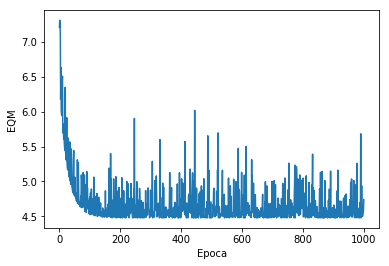

In [5]:
plt.plot(list(range(len(costs))), costs)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 8 na primeira época e que seu valor final ficou abaixo de 4. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.

## 2) Regressão Linear Múltipla

- Carregue os dados contidos no arquivo _ex1data2.txt_. O arquivo contem 47 linhas e 3 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 3 será estimada a partir das variáveis das coluna 1 e 2. Os dados apresentados referem-se a um problema de estimação do preço de casas. As variáveis 1 e 2 são a área da casa e o número de quartos, respectivamente. A variável 3 é o preço do imóvel.
- Implemente o algoritmo do gradiente descendente estocástico para encontrar os coeficientes da regressão. Para este algoritmo utilize **α = 0.01** e utilize **100 épocas**  de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM) . Plote o gráfico “épocas x EQM”.

    - **Apresentar:** Valor final dos coeficientes e gráfico épocas x EQM.
    - **Comentários**: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.
    


- Encontre os coeficientes da regressão utilizando o método dos mínimos quadrados.

    - **Apresentar**: Valor final dos coeficientes.
    - **Comentários**: Os valores obtidos pelos dois métodos são iguais? Comente.

### Carregando os dados do arquivo:

In [6]:
data = load_data('ex1data2.txt', ' ')

### Rodando o gradiente descendente estocástico:

In [7]:
(w, costs) = gradient_descent(data, alpha=0.01, n_epochs=100)

### Valores finais dos pesos:

In [8]:
print w

[[ 0.86919375]
 [ 1.39464644]
 [-0.08930299]]


### Gráfico “Epoca x EQM”:

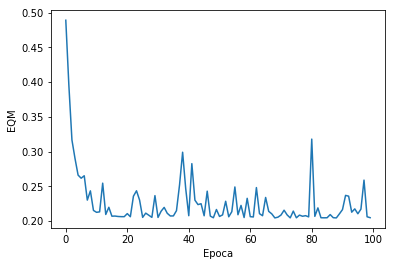

In [9]:
plt.plot(list(range(len(costs))), costs)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 0.45 na primeira época e que seu valor final ficou próximo de 0.25. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.

### Econtrando os coeficientes de regressão utilizando os mínimos quadrados:

In [10]:
def min_squares(data):
    X = get_x(data)
    y = get_y(data)
    return np.linalg.inv(X.T.dot(X)).T.dot(X.T.dot(y)) 

w_min_sqr = min_squares(data)

print w_min_sqr

[[ 0.8959791 ]
 [ 1.39210674]
 [-0.08738019]]


### Comparação entre os resultados do gradiente descendente e dos mínimos quadrados:

Os valores não são exatamente iguais, mas ficaram muito próximos. O valor obtido por meio do método dos mínimos quadrados é possivelmente mais preciso, pois a sua solução é analítica, muito embora erros númericos possam existir devido ao processo de inversão de matrizes. Outro fator que pode explicar essa diferença é o valor relativamente alto do alpha e um número relativamente baixo de épocas, ambos utilizados no gradiente descendente estocástico. 

## 3) Regularização

- Carregue os dados contidos no arquivo _ex1data3.txt_. O arquivo contem 47 linhas e 6 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 6 será estimada a partir das demais variáveis. Os dados apresentados referem-se a um problema de estimação do preço de casas. As variáveis 1, 2, 3, 4 e 5 são características dos imóveis e serão utilizadas como entrada do problema de regressão. A variável 6 é o preço do imóvel.
- Divida o conjunto de dados entre treino e teste. Para este problema, os primeiros 30 dados serão utilizados para treino e o restante será usado para teste.
- Encontre os coeficientes da regressão utilizando o método dos mínimos quadrados regularizado para os seguintes valores de λ = [0 1 2 3 4 5]. Utilize o conjunto de treinamento.

    - **Apresentar:** Valores finais dos coeficientes
    - **Comentários**: Quais variáveis parecem ser menos relevantes para a regressão?

### Apresentando os valores finais para cada coeficiente:

In [45]:
def min_squares_regularized(data, reg_coef):
    X = get_x(data)
    y = get_y(data)
    gram = X.T.dot(X)
    temp = gram + np.identity(len(gram))*reg_coef
    return np.linalg.inv(temp).T.dot(X.T.dot(y)) 

data = load_data('ex1data3.txt', ' ')

np.random.shuffle(data)

training = data[:31, :]
test = data[31:, :]

reg_coeficients = [0, 1, 2, 3, 4, 5]

for coef in reg_coeficients:
    print("Valores para o coeficiente {}:".format(coef))
    print(min_squares_regularized(training, coef))

Valores para o coeficiente 0:
[[ 1.03965592]
 [ 1.51377825]
 [-0.11134798]
 [ 0.13844586]
 [-0.24665123]
 [-0.0253594 ]]
Valores para o coeficiente 1:
[[ 0.51074402]
 [ 1.15397894]
 [ 0.04982393]
 [ 0.54313428]
 [-0.1947382 ]
 [ 0.11560532]]
Valores para o coeficiente 2:
[[ 0.38609738]
 [ 1.03565712]
 [ 0.11775786]
 [ 0.49876303]
 [-0.15295253]
 [ 0.2054592 ]]
Valores para o coeficiente 3:
[[ 0.32045973]
 [ 0.95661025]
 [ 0.16214838]
 [ 0.45955462]
 [-0.11931502]
 [ 0.25767431]]
Valores para o coeficiente 4:
[[ 0.27995502]
 [ 0.89778907]
 [ 0.19469895]
 [ 0.42931717]
 [-0.09133798]
 [ 0.28986981]]
Valores para o coeficiente 5:
[[ 0.25271137]
 [ 0.85147618]
 [ 0.22015049]
 [ 0.40562266]
 [-0.06756256]
 [ 0.31051539]]


### Relevância das variáveis para a regressão:

Analisando os pesos finais para a regressão com um coeficiente de regularização 5, é possível notas que as vriáveis 